In [2]:
# impotar las librerías
import numpy as np
import pandas as pd # para hacer gráficas y paneles
import datetime #para las fechas
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix #gráfica iteractiva



In [8]:
import yfinance as yf #importamos yahoo finance

In [9]:
# pip install yahoo finance (código para instalar yahoo finance)

### Vamos a comparar estadísticamente una lista de tickers

In [17]:
# Vamos a descargar 3 tickers
# necesitamos una fecha inicial y una fecha de termino

fecha_inicial = "2021-12-31" # definimos dos variables con la fecha final e inicial para después usarlas para descargar los precios de los tickers
fecha_final = "2023-10-05"



In [18]:
femsa = yf.download("FEMSAUBD.MX",fecha_inicial,fecha_final)
herdez = yf.download("HERDEZ.MX",fecha_inicial,fecha_final)
cuervo =  yf.download("CUERVO.MX",fecha_inicial,fecha_final)
ac =  yf.download("AC.MX",fecha_inicial,fecha_final)
alsea =  yf.download("ALSEA.MX",fecha_inicial,fecha_final) #descrgamos los precios de los tickers de fechas definidas previamente en las variables fecha_inicial y fecha_final


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [19]:
# creamos una lista de tickers
tickers = ["FEMSAUBD.MX","HERDEZ.MX","CUERVO.MX","AC.MX","ALSEA.MX"] #hicimos una variable con los tickers que luego usamos para hacer el dataframe
datos = yf.download(tickers,fecha_inicial,fecha_final)["Close"] #hicimos un dataframe con los precios close de los 5 tickers
datos

[*********************100%%**********************]  5 of 5 completed


,AC.MX,ALSEA.MX,CUERVO.MX,FEMSAUBD.MX,HERDEZ.MX
Date,,,,,
2021-12-31,130.520004,37.950001,51.360001,159.320007,40.480000
2022-01-03,128.520004,39.939999,51.270000,159.110001,39.990002
2022-01-04,130.869995,41.029999,51.139999,161.389999,39.869999
2022-01-05,129.750000,41.900002,50.810001,162.210007,39.700001
2022-01-06,128.740005,41.779999,50.560001,161.800003,39.990002
...,...,...,...,...,...
2023-09-28,158.050003,63.419998,42.560001,189.089996,41.830002
2023-09-29,158.770004,63.599998,41.619999,189.979996,40.619999
2023-10-02,160.149994,62.990002,41.590000,195.759995,40.610001


In [29]:
 desviacion = datos.std() # sacamos la desviación estandar de los datos usando la función .std

In [30]:
desviacion

AC.MX          17.694222
ALSEA.MX        7.981005
CUERVO.MX       3.470671
FEMSAUBD.MX    20.808200
HERDEZ.MX       6.963327
dtype: float64

In [31]:
# para sacar la varianza con una función
varianza = datos.var() # sacamos la varianza de los datos usando la función . var

In [32]:
varianza

AC.MX          313.085508
ALSEA.MX        63.696433
CUERVO.MX       12.045557
FEMSAUBD.MX    432.981202
HERDEZ.MX       48.487926
dtype: float64

In [34]:
# para sacar los rendimientos
rendimientos = datos.pct_change() #sacamos los rendimientos de los 5 tickers usando la función .pct_change
rendimientos

,AC.MX,ALSEA.MX,CUERVO.MX,FEMSAUBD.MX,HERDEZ.MX
Date,,,,,
2021-12-31,NaN,NaN,NaN,NaN,NaN
2022-01-03,-0.015323,0.052437,-0.001752,-0.001318,-0.012105
2022-01-04,0.018285,0.027291,-0.002536,0.014330,-0.003001
2022-01-05,-0.008558,0.021204,-0.006453,0.005081,-0.004264
2022-01-06,-0.007784,-0.002864,-0.004920,-0.002528,0.007305
...,...,...,...,...,...
2023-09-28,0.004832,0.001263,-0.016181,-0.001531,0.005529
2023-09-29,0.004556,0.002838,-0.022087,0.004707,-0.028927
2023-10-02,0.008692,-0.009591,-0.000721,0.030424,-0.000246


In [36]:
varianzarendimientos =  rendimientos.var() #sacamos la varianza de los rendimientos usando la versión var
varianzarendimientos

AC.MX          0.000211
ALSEA.MX       0.000352
CUERVO.MX      0.000247
FEMSAUBD.MX    0.000207
HERDEZ.MX      0.000489
dtype: float64

In [37]:
herdez["Rendimientos"] = (herdez["Close"]/herdez["Close"].shift(1))-1 # sacamos los rendimientos de los precios close de herdez

In [39]:
herdez = herdez[["Close","Rendimientos"]] # hicimos un dataframe en donde solo salen los close y los rendimientos

In [44]:
herdez

,Close,Rendimientos
Date,,
2021-12-31,40.480000,NaN
2022-01-03,39.990002,-0.012105
2022-01-04,39.869999,-0.003001
2022-01-05,39.700001,-0.004264
2022-01-06,39.990002,0.007305
...,...,...
2023-09-28,41.830002,0.005529
2023-09-29,40.619999,-0.028927
2023-10-02,40.610001,-0.000246


<Axes: >

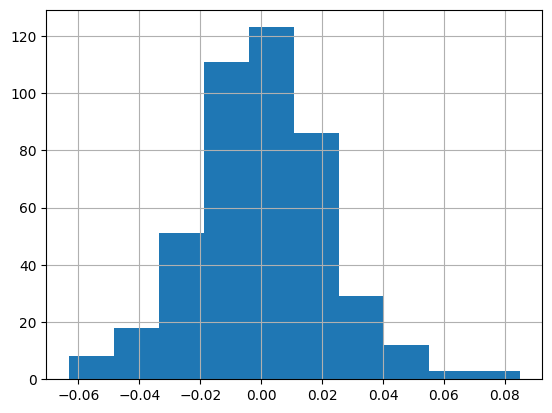

In [52]:
herdez["Rendimientos"].hist(bins = 10) #bins es en cuantas barras quieres dividir el invervalo
#graficamos un histograma de los rendimientos de herdez usando la función .hist